In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data
import acquire as aq

## Exercises 

#### Using your store items data:

#### Convert date column to datetime format:

In [2]:
df = aq.get_merged_data()

In [3]:
df['sale_date'] = df['sale_date'].astype('datetime64')

#### Plot the distribution of sale_amount and item_price.

<AxesSubplot:>

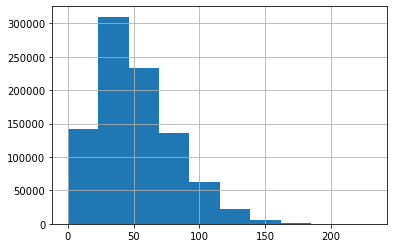

In [4]:
# sale amount
df.sale_amount.hist()

<AxesSubplot:>

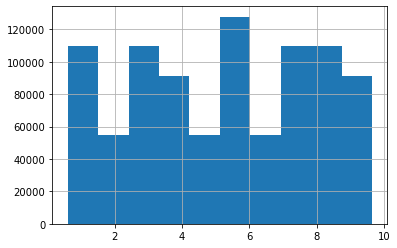

In [5]:
# item price
df.item_price.hist()

#### Add a 'month' and 'day of the week' column to your dataframe

In [6]:
df['month'] = df.sale_date.dt.month
df['day_of_week'] = df.sale_date.dt.day_name()

#### Set the index of the datetime variable

In [7]:
df.sale_date = df.sale_date.dt.date
df = df.set_index('sale_date').sort_index()

In [8]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


##### These snippets of code will be reproducible in a prepare.py file

### Using OPS Data, complete the following:

#### Convert date column to datetime format.

In [9]:
df = aq.get_german_power_data()

In [10]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [11]:
df.Date = pd.to_datetime(df.Date)

#### plot the distribution of each of your variables

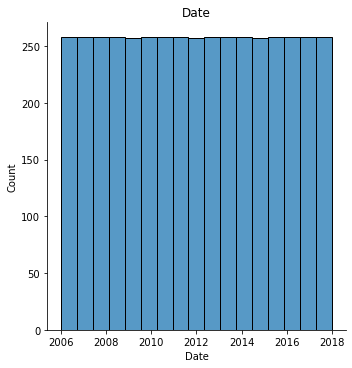

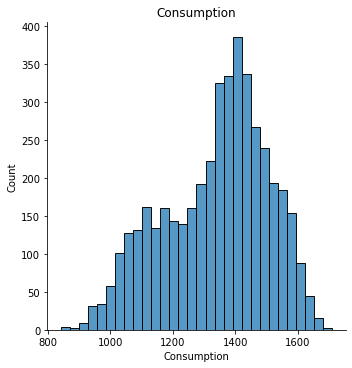

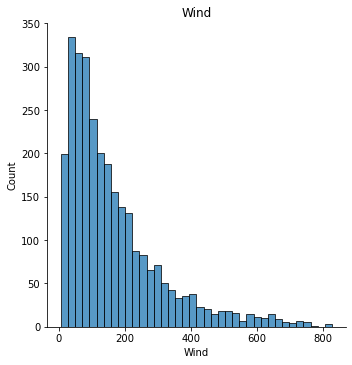

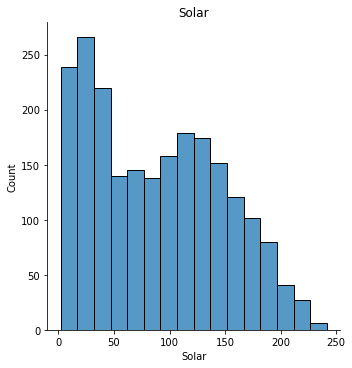

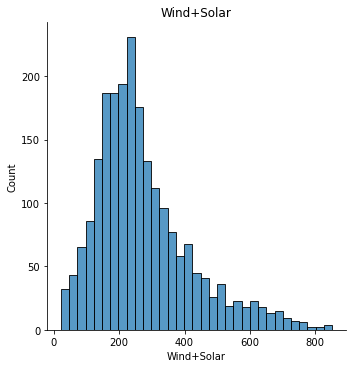

In [12]:
for col in df.columns:
    sns.displot(x=col, data= df)
    plt.title(col)
    plt.show()

#### set the index to be the datetime variable:

In [13]:
# df = df.set_index('Date').sort_index()
# code sets the index, however, it removed attribute from object

In [14]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


#### Add a month and a year column to your dataframe.

In [15]:
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [16]:
# now index
df = df.set_index('Date').sort_index()

#### Fill any missing values

In [17]:
df.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [18]:
# fill the nulls
df.Wind.fillna(0, inplace = True)
df.Solar.fillna(0, inplace = True)
df['Wind+Solar'].fillna(df.Wind + df.Solar, inplace = True)

##### These snippets of code will be reproducible in a prepare.py file